<a href="https://colab.research.google.com/github/LyaRB/SenalesySistemas/blob/main/Parcial2/Punto_3_Parcial_2_Corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data downloaded for google drive
FILEID = "12w6LpKJyZdSkE2bF7o689ZKadeMqlJIO"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-11-05 23:04:46--  https://docs.google.com/uc?export=download&confirm=t&id=12w6LpKJyZdSkE2bF7o689ZKadeMqlJIO
Resolving docs.google.com (docs.google.com)... 172.217.15.238, 2607:f8b0:4025:810::200e
Connecting to docs.google.com (docs.google.com)|172.217.15.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oqa1jme0u7t8nacvt9331jvgpvlmdv3j/1699225425000/02321151671634465468/*/12w6LpKJyZdSkE2bF7o689ZKadeMqlJIO?e=download&uuid=7100f6a4-0575-4b97-a08a-10679d70b96f [following]
--2023-11-05 23:04:47--  https://doc-0o-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oqa1jme0u7t8nacvt9331jvgpvlmdv3j/1699225425000/02321151671634465468/*/12w6LpKJyZdSkE2bF7o689ZKadeMqlJIO?e=download&uuid=7100f6a4-0575-4b97-a08a-10679d70b96f
Resolving doc-0o-3s-docs.googleusercontent.com (doc-0o-3s-docs.googleusercontent.com)... 172.217.12.1, 2607:f8b0:402

In [ ]:
# @title Instalación de librerias

import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
datos = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(datos)

In [ ]:
# @title Obtencion de datos
Xt = dicX['F'] #datos en el tiempo
#Carga los datos de la variable 'F' almacenados en el diccionario 'dicX'
#Estos datos representan mediciones en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR',
           'IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases

Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333


In [ ]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue)) #valores únicos de los fallos, pueden repetirse

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xt, Ytrue, test_size=0.3) #30% de los datos para entrenar y 70% para pruebas
#los almacena en las variables
print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape},Ytest {Ytest.shape}") #indica que se adaptó a los nuevos datos

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000),Ytest (360,)


Gráfica de la señal promedio respecto al tiempo.
Tomamos las señales en el vector de Xtrain, tiene 840 señales con 4000 muestras cada una. Sacamos el promedio de las 840 señales y queda un vector con las 4000 muestras de 1 sola señal.
El vector de tiempo se toma desde 0 hasta el periodo de todas las señales (que mas arriba se ve que es 0.333[s]) y con las mismas 4000 muestras o divisiones que se requieren.

Text(0.5, 1.0, 'Gráfica en tiempo')

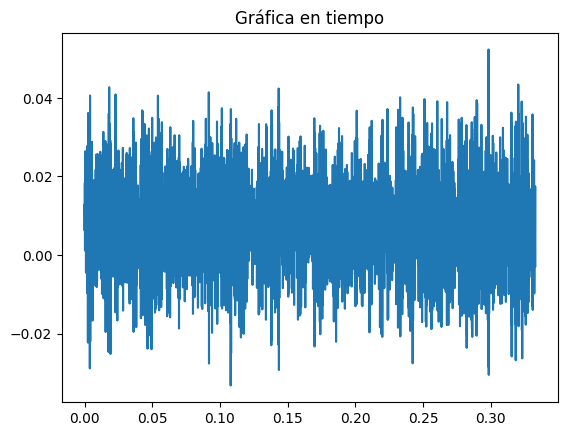

In [ ]:
XT = np.mean(Xtrain,axis=0)
vt = np.linspace(0,0.333,4000)
plt.plot(vt,XT)
plt.title('Gráfica en tiempo')

Cálculo de las transformadas, un vector de frecuencias (vf) en base al número de muestras en el arreglo de los datos de entrenamiento (4000) y un vector de señales transformadas (Xw) con las señales de entrenamiento.

In [ ]:
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #vector frecuencias
Xw = (abs(np.fft.rfft(Xtrain))) # FFT de train

vf2 = np.fft.rfftfreq(Xtest.shape[1],1/Fs)
Xw2 = np.fft.rfft(Xtest) # FFT de test

Xw.shape

(840, 2001)

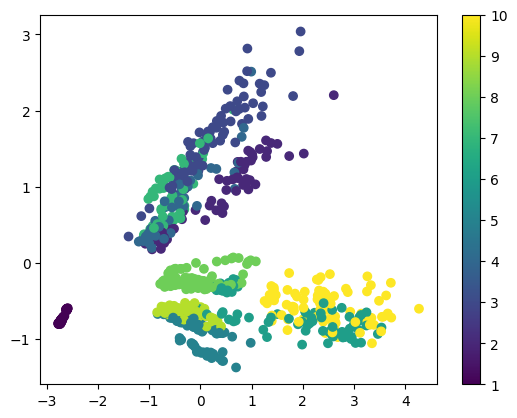

In [33]:
#graficar espectro para clases representativas. Reduce los datos sin perder mucha info
sca_ = MinMaxScaler() #normaliza los datos
Xw_ = sca_.fit_transform(Xw.T).T
#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

In [34]:
np.unique(Ytrain)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

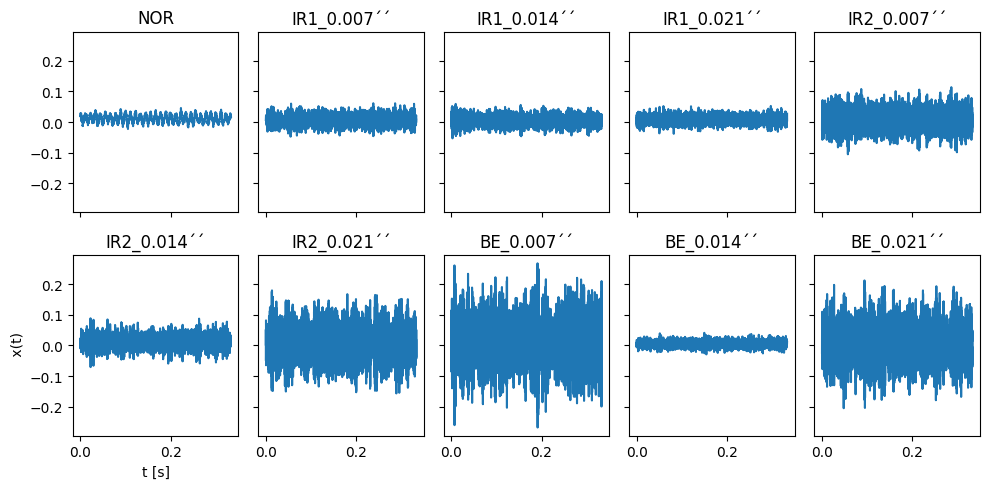

In [ ]:
#graficar señales en tiempo y en frecuencia desde Xtrain y Ytrain

nrows = 2 #N° filas
ncols = 5 #N° columnas

#grafica en el tiempo señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(tv,Xtrain[Ytrain==ncols*i+j+1].mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('t [s]')
ax[1,0].set_ylabel(' x(t)')
plt.tight_layout()
plt.show()

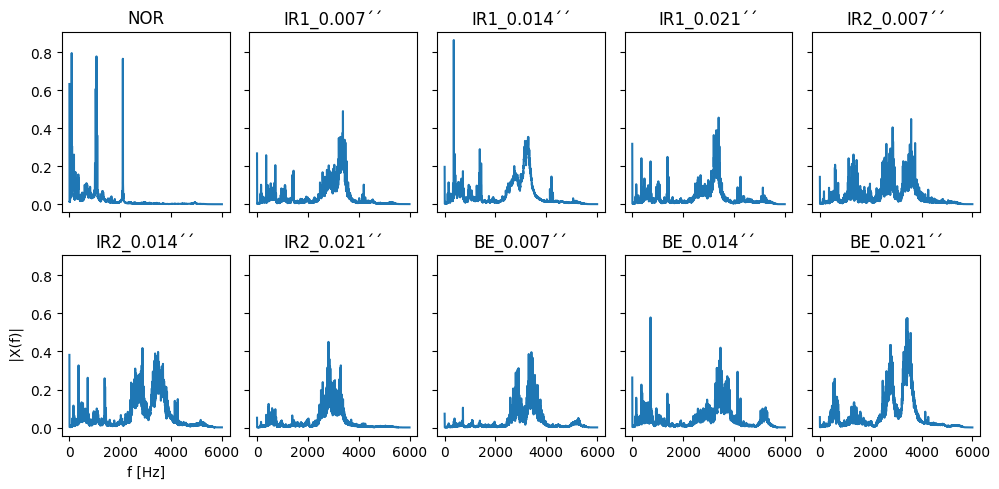

In [ ]:
#grafica frecuencia - señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(vf,abs(Xw_[Ytrain==ncols*i+j+1]).mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('f [Hz]')
ax[1,0].set_ylabel(' |X(f)|')
plt.tight_layout()
plt.show()


In [ ]:
from scipy.spatial.distance import cdist
#fft Xtest
Xwt = (abs(np.fft.rfft(Xtest))) # FFT
Xwt_ = sca_.fit_transform(Xwt.T).T

Dtr_te = cdist(Xw_,Xwt_)
Dtr_te.shape #distancias espectros Xtrain vs Xtest

(840, 360)

In [ ]:
ind_ = np.argmin(Dtr_te,axis=0)
ind_.shape

(360,)

In [ ]:
Ytest_e = Ytrain[ind_]

In [ ]:
from sklearn.metrics import accuracy_score

print(f"ACC={accuracy_score(Ytest,Ytest_e)}")

ACC=1.0
